In [6]:
import sys
import matplotlib.pyplot as plt

import numpy as np
from imageio import imread, imwrite
from scipy.ndimage.filters import convolve

Reading of image

In [7]:
img = imread("123.jpg")
img

Image([[[147, 133, 107],
        [159, 143, 117],
        [ 98,  81,  53],
        ...,
        [177, 196, 228],
        [180, 199, 229],
        [183, 202, 232]],

       [[ 96,  81,  58],
        [ 97,  81,  56],
        [120, 100,  75],
        ...,
        [181, 198, 226],
        [178, 195, 223],
        [177, 194, 222]],

       [[ 78,  61,  43],
        [ 85,  67,  47],
        [147, 125, 104],
        ...,
        [186, 202, 227],
        [197, 213, 238],
        [206, 220, 246]],

       ...,

       [[ 10, 109,  89],
        [ 21, 118,  99],
        [ 32, 129, 110],
        ...,
        [149, 180, 172],
        [145, 176, 168],
        [136, 167, 159]],

       [[ 30, 127, 107],
        [ 32, 129, 109],
        [ 34, 129, 109],
        ...,
        [171, 202, 196],
        [147, 178, 172],
        [123, 154, 149]],

       [[ 40, 135, 113],
        [ 36, 131, 109],
        [ 31, 124, 103],
        ...,
        [170, 202, 197],
        [164, 194, 192],
        [163, 193, 191]]

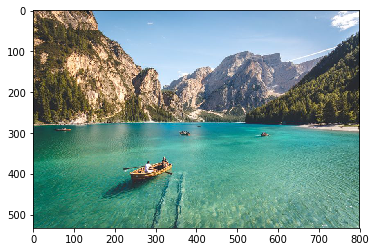

In [11]:
plt.imshow(img)
plt.show()

In [7]:
r,c,_=img.shape
print(r,c,_)

533 800 3


Calculating energy map

for each pixel in the image, for every channel, we perform the following:

Find the partial derivative in the x axis
Find the partial derivative in the y axis
Sum their absolute values
This will be the energy value for that pixel. This brings up the question, “how do you compute the derivative of an image?”. The Image derivations page on Wikipedia points us to a number of different ways to compute the derivative of the image. We’ll be using the Sobel filter.

In [9]:
#for partial derivative in X

filter_du = np.array([
        [1.0, 2.0, 1.0],
        [0.0, 0.0, 0.0],
        [-1.0, -2.0, -1.0],
    ])
# This converts it from a 2D filter to a 3D filter, replicating the same
# filter for each channel: R, G, B
filter_du = np.stack([filter_du] * 3, axis=2)
filter_du

array([[[ 1.,  1.,  1.],
        [ 2.,  2.,  2.],
        [ 1.,  1.,  1.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[-1., -1., -1.],
        [-2., -2., -2.],
        [-1., -1., -1.]]])

In [12]:
#for partial derivative in Y

filter_dv = np.array([
        [1.0, 0.0, -1.0],
        [2.0, 0.0, -2.0],
        [1.0, 0.0, -1.0],
    ])
# This converts it from a 2D filter to a 3D filter, replicating the same
# filter for each channel: R, G, B
filter_dv = np.stack([filter_dv] * 3, axis=2)
filter_dv

array([[[ 1.,  1.,  1.],
        [ 0.,  0.,  0.],
        [-1., -1., -1.]],

       [[ 2.,  2.,  2.],
        [ 0.,  0.,  0.],
        [-2., -2., -2.]],

       [[ 1.,  1.,  1.],
        [ 0.,  0.,  0.],
        [-1., -1., -1.]]])

In [13]:
img = img.astype('float32')
img

Image([[[147., 133., 107.],
        [159., 143., 117.],
        [ 98.,  81.,  53.],
        ...,
        [177., 196., 228.],
        [180., 199., 229.],
        [183., 202., 232.]],

       [[ 96.,  81.,  58.],
        [ 97.,  81.,  56.],
        [120., 100.,  75.],
        ...,
        [181., 198., 226.],
        [178., 195., 223.],
        [177., 194., 222.]],

       [[ 78.,  61.,  43.],
        [ 85.,  67.,  47.],
        [147., 125., 104.],
        ...,
        [186., 202., 227.],
        [197., 213., 238.],
        [206., 220., 246.]],

       ...,

       [[ 10., 109.,  89.],
        [ 21., 118.,  99.],
        [ 32., 129., 110.],
        ...,
        [149., 180., 172.],
        [145., 176., 168.],
        [136., 167., 159.]],

       [[ 30., 127., 107.],
        [ 32., 129., 109.],
        [ 34., 129., 109.],
        ...,
        [171., 202., 196.],
        [147., 178., 172.],
        [123., 154., 149.]],

       [[ 40., 135., 113.],
        [ 36., 131., 109.],
        [ 31., 1

In [21]:
convolved = np.absolute(convolve(img, filter_du)) + np.absolute(convolve(img, filter_dv))
print(convolved.shape)
convolved

(533, 800, 3)


array([[[752., 736., 720.],
        [846., 864., 882.],
        [284., 320., 356.],
        ...,
        [ 76.,  48.,  20.],
        [ 68.,  80.,  92.],
        [ 92., 108., 124.]],

       [[912., 882., 852.],
        [702., 660., 618.],
        [414., 388., 362.],
        ...,
        [152., 104.,  56.],
        [236., 198., 160.],
        [268., 232., 196.]],

       [[252., 260., 268.],
        [904., 892., 880.],
        [970., 946., 922.],
        ...,
        [520., 448., 376.],
        [784., 674., 564.],
        [832., 690., 548.]],

       ...,

       [[234., 216., 198.],
        [302., 284., 266.],
        [182., 160., 138.],
        ...,
        [432., 450., 468.],
        [220., 202., 184.],
        [538., 518., 498.]],

       [[332., 308., 284.],
        [220., 192., 164.],
        [ 30.,  66., 102.],
        ...,
        [380., 398., 416.],
        [606., 622., 638.],
        [470., 488., 506.]],

       [[124., 108.,  92.],
        [114., 104.,  94.],
        [138., 1

In [23]:
# We sum the energies in the red, green, and blue channels
energy_map = convolved.sum(axis=2)
print(energy_map.shape)
energy_map

(533, 800)


array([[2208., 2592.,  960., ...,  144.,  240.,  324.],
       [2646., 1980., 1164., ...,  312.,  594.,  696.],
       [ 780., 2676., 2838., ..., 1344., 2022., 2070.],
       ...,
       [ 648.,  852.,  480., ..., 1350.,  606., 1554.],
       [ 924.,  576.,  198., ..., 1194., 1866., 1464.],
       [ 324.,  312.,  492., ...,  186., 1308., 1488.]], dtype=float32)

Finding the seam with least energy

In [24]:
M = energy_map.copy()
backtrack = np.zeros_like(M, dtype=np.int)
backtrack

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
for i in range(1, r):
    for j in range(0, c):
        # Handle the left edge of the image, to ensure we don't index -1
        if j == 0:
            idx = np.argmin(M[i - 1, j:j + 2])
            backtrack[i, j] = idx + j
            min_energy = M[i - 1, idx + j]
        else:
            idx = np.argmin(M[i - 1, j - 1:j + 2])
            backtrack[i, j] = idx + j - 1
            min_energy = M[i - 1, idx + j - 1]

        M[i, j] += min_energy

In [29]:
M

array([[2.20800e+03, 2.59200e+03, 9.60000e+02, ..., 1.44000e+02,
        2.40000e+02, 3.24000e+02],
       [4.85400e+03, 2.94000e+03, 2.12400e+03, ..., 4.56000e+02,
        7.38000e+02, 9.36000e+02],
       [3.72000e+03, 4.80000e+03, 4.96200e+03, ..., 1.63600e+03,
        2.47800e+03, 2.80800e+03],
       ...,
       [1.60508e+05, 1.60402e+05, 1.60030e+05, ..., 1.69836e+05,
        1.69092e+05, 1.70076e+05],
       [1.61326e+05, 1.60606e+05, 1.60006e+05, ..., 1.70286e+05,
        1.70958e+05, 1.70556e+05],
       [1.60930e+05, 1.60318e+05, 1.60498e+05, ..., 1.70340e+05,
        1.71594e+05, 1.72044e+05]], dtype=float32)

In [30]:
backtrack

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   2,   2, ..., 797, 797, 798],
       [  1,   2,   2, ..., 796, 797, 798],
       ...,
       [  1,   2,   2, ..., 797, 797, 798],
       [  1,   2,   3, ..., 798, 798, 798],
       [  1,   2,   2, ..., 796, 797, 799]])

Deleting the pixels from the seam with the least energy

In [32]:
# Create a (r, c) matrix filled with the value True
# We'll be removing all pixels from the image which
# have False later
mask = np.ones((r, c), dtype=np.bool)
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [33]:
# Find the position of the smallest element in the
# last row of M
j = np.argmin(M[-1])
j

552

In [34]:
for i in reversed(range(r)):
    # Mark the pixels for deletion
    mask[i, j] = False
    j = backtrack[i, j]

In [35]:
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [36]:
# Since the image has 3 channels, we convert our
# mask to 3D
mask = np.stack([mask] * 3, axis=2)

In [37]:
# Delete all the pixels marked False in the mask,
# and resize it to the new image dimensions
img = img[mask].reshape((r, c - 1, 3))

In [38]:
img.shape  #we have to reapeat for each column

(533, 799, 3)

Enter the input file name(Ex:- 123.jpg) : 123.jpg
Original Dimension of input file :  533 800 3
Enter Value New Dimension(Ex:- New_Row_Value New_Column_Value) : 300 400
Enter the output file name(Ex:- 456.jpg) : 222.jpg


100%|██████████| 400/400 [00:22<00:00, 26.65it/s]


--------------------------------------------------------------------
Input File
--------------------------------------------------------------------


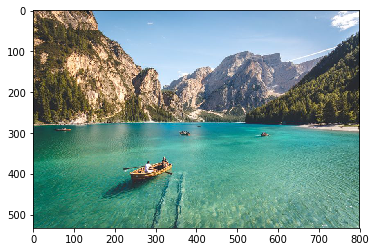

--------------------------------------------------------------------
Output File
--------------------------------------------------------------------


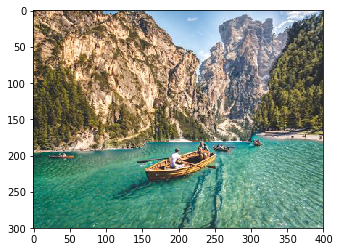

In [13]:
import sys
import numba
from tqdm import trange
import numpy as np
from imageio import imread, imwrite
from scipy.ndimage.filters import convolve
import matplotlib.pyplot as plt

def calc_energy(img):
    filter_du = np.array([
        [1.0, 2.0, 1.0],
        [0.0, 0.0, 0.0],
        [-1.0, -2.0, -1.0],
    ])
    # This converts it from a 2D filter to a 3D filter, replicating the same
    # filter for each channel: R, G, B
    filter_du = np.stack([filter_du] * 3, axis=2)

    filter_dv = np.array([
        [1.0, 0.0, -1.0],
        [2.0, 0.0, -2.0],
        [1.0, 0.0, -1.0],
    ])
    # This converts it from a 2D filter to a 3D filter, replicating the same
    # filter for each channel: R, G, B
    filter_dv = np.stack([filter_dv] * 3, axis=2)

    img = img.astype('float32')
    convolved = np.absolute(convolve(img, filter_du)) + np.absolute(convolve(img, filter_dv))

    # We sum the energies in the red, green, and blue channels
    energy_map = convolved.sum(axis=2)

    return energy_map

def crop_c(img, new_c):
    r, c, _ = img.shape
    for i in trange(c - new_c):        # use range if you don't want to use tqdm
        img = carve_column(img)
    return img

def crop_r(img, new_r):
    img = np.rot90(img, 1, (0, 1))
    img = crop_c(img, new_r)
    img = np.rot90(img, 3, (0, 1))
    return img

def crop_r_c(img,new_r,new_c):
    img = crop_r(img, new_r)
    img = crop_c(img, new_c)
    return img

@numba.jit
def carve_column(img):
    r, c, _ = img.shape

    M, backtrack = minimum_seam(img)
    mask = np.ones((r, c), dtype=np.bool)

    j = np.argmin(M[-1])
    for i in reversed(range(r)):
        mask[i, j] = False
        j = backtrack[i, j]

    mask = np.stack([mask] * 3, axis=2)
    img = img[mask].reshape((r, c - 1, 3))
    return img

@numba.jit
def minimum_seam(img):
    r, c, _ = img.shape
    energy_map = calc_energy(img)

    M = energy_map.copy()
    backtrack = np.zeros_like(M, dtype=np.int)

    for i in range(1, r):
        for j in range(0, c):
            # Handle the left edge of the image, to ensure we don't index a -1
            if j == 0:
                idx = np.argmin(M[i-1, j:j + 2])
                backtrack[i, j] = idx + j
                min_energy = M[i-1, idx + j]
            else:
                idx = np.argmin(M[i - 1, j - 1:j + 2])
                backtrack[i, j] = idx + j - 1
                min_energy = M[i - 1, idx + j - 1]

            M[i, j] += min_energy

    return M, backtrack

def main():
    in_filename = input("Enter the input file name(Ex:- 123.jpg) : ")
    img = imread(in_filename)
    old_r,old_c,_=img.shape
    print("Original Dimension of input file : ",old_r,old_c,_)
    new_r,new_c=input("Enter Value New Dimension(Ex:- New_Row_Value New_Column_Value) : ").split()
    new_r=int(new_r)
    new_c=int(new_c)
    if new_r>=old_r and new_c>=old_c:
        print("Enter the value less than original dimension")
        sys.exit(1)
    out_filename = input("Enter the output file name(Ex:- 456.jpg) : ")


    if old_r!=new_r and old_c!=new_c:
        out=crop_r_c(img,new_r,new_c)
    elif old_r!=new_r:
        out = crop_r(img, new_r)
    elif old_c!=new_c:
        out = crop_c(img, new_c)
    
    imwrite(out_filename, out)
    print("--------------------------------------------------------------------")
    print("Input File")
    print("--------------------------------------------------------------------")
    plt.imshow(img)
    plt.show()
    print("--------------------------------------------------------------------")
    print("Output File")
    print("--------------------------------------------------------------------")
    plt.imshow(out)
    plt.show()

if __name__ == '__main__':
    main()